# **Covid-19 Diagnosis Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test.

In [ ]:
df = pd.read_csv('/content/corona_tested_006 (2).csv')

<ipython-input-2-339c56ce8d66>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/corona_tested_006 (2).csv')


In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


The dataset contains 278,848 records

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

The dataset has not any missing values

In [ ]:
# Get unique values in categorical columns
unique_values = {col: df[col].unique() for col in df.select_dtypes(include='object').columns}
unique_values

{'Test_date': array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
        '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
        '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
        '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
        '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
        '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
        '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
        '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
        '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
        '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
        '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
        '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
        '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object),
 'Cough_symptoms': array(['TRUE', 'FALSE', 'None', False, True], dtype=object),
 'Fever': array(['FALSE', 'TRUE', 'None', False, True], dtype=object),
 '

In [ ]:
# For Cough Symptoms

# Replace values in the 'Cough_symptoms' column

# Replace 'False' with 'FALSE'
df['Cough_symptoms'] = df['Cough_symptoms'].replace(False, 'FALSE')

# Replace 'True' with 'TRUE'
df['Cough_symptoms'] = df['Cough_symptoms'].replace(True, 'TRUE')

# Replace 'None' with 'FALSE'
df['Cough_symptoms'] = df['Cough_symptoms'].replace('None', 'FALSE')

# Check the unique values in the 'Cough_symptoms' column after replacement
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE'], dtype=object)

In [ ]:
# Replace values in the 'Fever' column

# Replace 'False' with 'FALSE'
df['Fever'] = df['Fever'].replace(False, 'FALSE')

# Replace 'True' with 'TRUE'
df['Fever'] = df['Fever'].replace(True, 'TRUE')

# Replace 'None' with 'FALSE'
df['Fever'] = df['Cough_symptoms'].replace('None', 'FALSE')

# Check the unique values in the 'Fever' column after replacement
df['Fever'].unique()

array(['TRUE', 'FALSE'], dtype=object)

In [ ]:
# Replace values in the 'Sore_throat' column

# Replace 'False' with 'FALSE'
df['Sore_throat'] = df['Sore_throat'].replace(False, 'FALSE')

# Replace 'True' with 'TRUE'
df['Sore_throat'] = df['Sore_throat'].replace(True, 'TRUE')

# Replace 'None' with 'FALSE'
df['Sore_throat'] = df['Sore_throat'].replace('None', 'FALSE')

# Check the unique values in the 'Fever' column after replacement
df['Sore_throat'].unique()

array(['TRUE', 'FALSE'], dtype=object)

In [ ]:
# Replace values in the 'Shortness_of_breath' column

# Replace 'False' with 'FALSE'
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace(False, 'FALSE')

# Replace 'True' with 'TRUE'
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace(True, 'TRUE')

# Replace 'None' with 'FALSE'
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace('None', 'FALSE')

# Check the unique values in the 'Fever' column after replacement
df['Fever'].unique()

array(['TRUE', 'FALSE'], dtype=object)

In [ ]:
# Replace values in the 'Headache' column

# Replace 'False' with 'FALSE'
df['Headache'] = df['Headache'].replace(False, 'FALSE')

# Replace 'True' with 'TRUE'
df['Headache'] = df['Headache'].replace(True, 'TRUE')

# Replace 'None' with 'FALSE'
df['Headache'] = df['Headache'].replace('None', 'FALSE')

# Check the unique values in the 'Fever' column after replacement
df['Headache'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [ ]:
# Count the occurrences of each category in the 'Corona' column
corona_counts = df['Corona'].value_counts()
corona_counts

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
# Remove rows where the 'Corona' column has the value 'other'
df = df[df['Corona'] != 'other']
# Confirm the removal by checking the unique values in the 'Corona' column
df['Corona'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
# Count the unique values in the 'Age_60_above' column, 'Sex' column, and 'Known_contact' column
unique_counts = {col: df[col].value_counts() for col in ['Age_60_above', 'Sex', 'Known_contact']}
unique_counts

{'Age_60_above': None    125664
 No      123867
 Yes      25425
 Name: Age_60_above, dtype: int64,
 'Sex': female    128541
 male      127370
 None       19045
 Name: Sex, dtype: int64,
 'Known_contact': Other                     239404
 Abroad                     25074
 Contact with confirmed     10478
 Name: Known_contact, dtype: int64}

In [ ]:
# Remove rows where the 'Sex' column has the value 'None'
df = df[df['Sex'] != 'None']

# Drop the 'Known_contact' column
df = df.drop('Known_contact', axis=1)

# Drop the 'Age_60_above' column
df = df.drop('Age_60_above', axis=1)


In [ ]:
# Create a new dataframe with the modified data
df_new = df.copy()
df_new

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
13727,13728,22-03-2020,TRUE,TRUE,FALSE,FALSE,FALSE,negative,male
13728,13729,22-03-2020,TRUE,TRUE,FALSE,FALSE,FALSE,negative,female
13730,13731,22-03-2020,TRUE,TRUE,FALSE,FALSE,FALSE,positive,female
13734,13735,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,male
13735,13736,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,female
...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,male
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,female
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,male
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,male


In [ ]:
import seaborn as sns
# Set the style of the plots
sns.set(style="whitegrid")

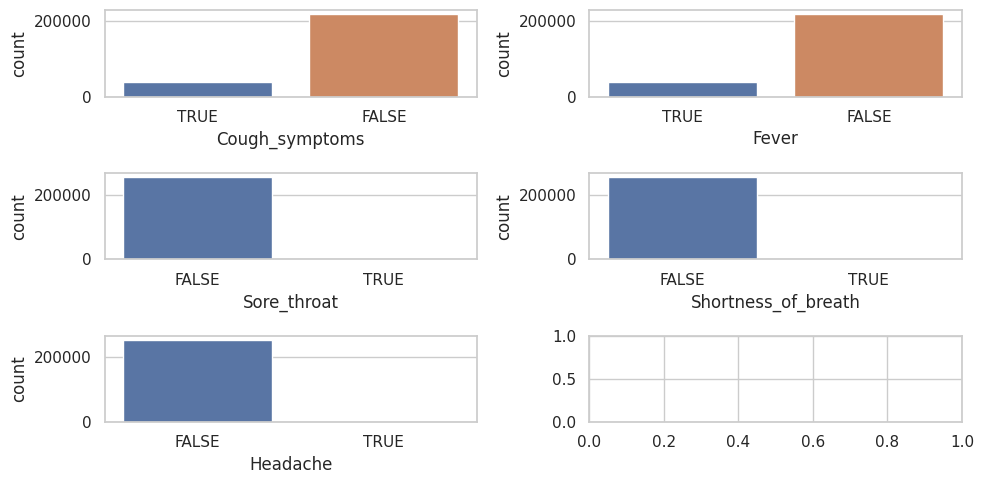

In [ ]:
# Create subplots for univariate analysis
fig, axes = plt.subplots(3, 2, figsize=(10, 5))

# Univariate analysis
sns.countplot(ax=axes[0, 0], x='Cough_symptoms', data=df_new)
sns.countplot(ax=axes[0, 1], x='Fever', data=df_new)
sns.countplot(ax=axes[1, 0], x='Sore_throat', data=df_new)
sns.countplot(ax=axes[1, 1], x='Shortness_of_breath', data=df_new)
sns.countplot(ax=axes[2, 0], x='Headache', data=df_new)
plt.tight_layout()
plt.show()

The first five subplots show the count of occurrences for each symptom (Cough, Fever, Sore throat, Shortness of breath, and Headache).

In [ ]:
# Drop the 'Test_date' and 'Ind_ID' columns
df_new = df_new.drop(['Test_date', 'Ind_ID'], axis=1)
df_new.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
13727,TRUE,TRUE,FALSE,FALSE,FALSE,negative,male
13728,TRUE,TRUE,FALSE,FALSE,FALSE,negative,female
13730,TRUE,TRUE,FALSE,FALSE,FALSE,positive,female
13734,FALSE,FALSE,FALSE,FALSE,FALSE,negative,male
13735,FALSE,FALSE,FALSE,FALSE,FALSE,negative,female


In [ ]:
# Perform one-hot encoding for categorical variables
encoded_df = pd.get_dummies(df_new, columns=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Sex'])
encoded_df.head()

,Cough_symptoms_FALSE,Cough_symptoms_TRUE,Fever_FALSE,Fever_TRUE,Sore_throat_FALSE,Sore_throat_TRUE,Shortness_of_breath_FALSE,Shortness_of_breath_TRUE,Headache_FALSE,Headache_TRUE,Corona_negative,Corona_positive,Sex_female,Sex_male
13727,0,1,0,1,1,0,1,0,1,0,1,0,0,1
13728,0,1,0,1,1,0,1,0,1,0,1,0,1,0
13730,0,1,0,1,1,0,1,0,1,0,0,1,1,0
13734,1,0,1,0,1,0,1,0,1,0,1,0,0,1
13735,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df_new.drop('Corona', axis=1)
y = df_new['Corona']
X.head(), y.head()

(      Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache     Sex
 13727           TRUE   TRUE       FALSE               FALSE    FALSE    male
 13728           TRUE   TRUE       FALSE               FALSE    FALSE  female
 13730           TRUE   TRUE       FALSE               FALSE    FALSE  female
 13734          FALSE  FALSE       FALSE               FALSE    FALSE    male
 13735          FALSE  FALSE       FALSE               FALSE    FALSE  female,
 13727    negative
 13728    negative
 13730    positive
 13734    negative
 13735    negative
 Name: Corona, dtype: object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode the categorical columns in X
X_encoded = pd.get_dummies(X)

# Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_encoded.head(), y_encoded

(       Cough_symptoms_FALSE  Cough_symptoms_TRUE  Fever_FALSE  Fever_TRUE  \
 13727                     0                    1            0           1   
 13728                     0                    1            0           1   
 13730                     0                    1            0           1   
 13734                     1                    0            1           0   
 13735                     1                    0            1           0   
 
        Sore_throat_FALSE  Sore_throat_TRUE  Shortness_of_breath_FALSE  \
 13727                  1                 0                          1   
 13728                  1                 0                          1   
 13730                  1                 0                          1   
 13734                  1                 0                          1   
 13735                  1                 0                          1   
 
        Shortness_of_breath_TRUE  Headache_FALSE  Headache_TRUE  Sex_female  \
 1372

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Build and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_accuracy)


0.9588535255846667


In [ ]:
logreg_classification_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     48432\n           1       0.92      0.26      0.40      2751\n\n    accuracy                           0.96     51183\n   macro avg       0.94      0.63      0.69     51183\nweighted avg       0.96      0.96      0.95     51183\n'

In [ ]:
# Build and train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_accuracy

0.9588535255846667

In [ ]:
dt_classification_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     48432\n           1       0.92      0.26      0.40      2751\n\n    accuracy                           0.96     51183\n   macro avg       0.94      0.63      0.69     51183\nweighted avg       0.96      0.96      0.95     51183\n'

In [ ]:
# Build and train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)
rf_accuracy

0.9588535255846667

In [ ]:
rf_classification_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     48432\n           1       0.92      0.26      0.40      2751\n\n    accuracy                           0.96     51183\n   macro avg       0.94      0.63      0.69     51183\nweighted avg       0.96      0.96      0.95     51183\n'

All three models achieved the same accuracy of 95.89%. The classification reports provide additional insights into the precision, recall, and F1-score for each class.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the logistic regression model
logreg_cv_scores = cross_val_score(logreg_model, X_encoded, y_encoded, cv=5)

# Perform cross-validation for the decision tree model
dt_cv_scores = cross_val_score(dt_model, X_encoded, y_encoded, cv=5)

# Perform cross-validation for the random forest model
rf_cv_scores = cross_val_score(rf_model, X_encoded, y_encoded, cv=5)

logreg_cv_scores, dt_cv_scores, rf_cv_scores

(array([0.9662974 , 0.96533938, 0.96211559, 0.9546911 , 0.94709077]),
 array([0.9662974 , 0.96533938, 0.96211559, 0.9546911 , 0.94709077]),
 array([0.9662974 , 0.96533938, 0.96211559, 0.9546911 , 0.94709077]))